## **Data Visualizations**

In [1]:
# Importing packages 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('songs_normalize.csv')
# Removing duplciate rows
dataframe_filtered = df.drop_duplicates()
duplicate_rows = len(df) - (len(dataframe_filtered)) 
print(duplicate_rows)

59


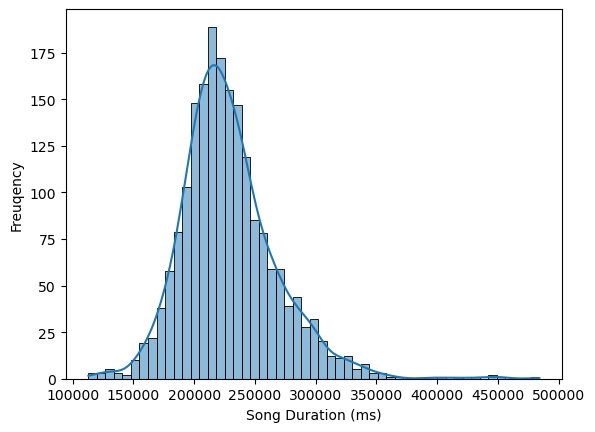

In [3]:
sns.histplot(data = dataframe_filtered, x = 'duration_ms', kde = True)
plt.xlabel('Song Duration (ms)')
plt.ylabel('Freuqency')
plt.show()

In right skewed data, the mean > median. According to the statitsics computed, the mean is 228,594.97 and the median is 223,186.00. Thus, we have confirmed that 'Song Duration (ms)' is right skewed or positvely skewed.  

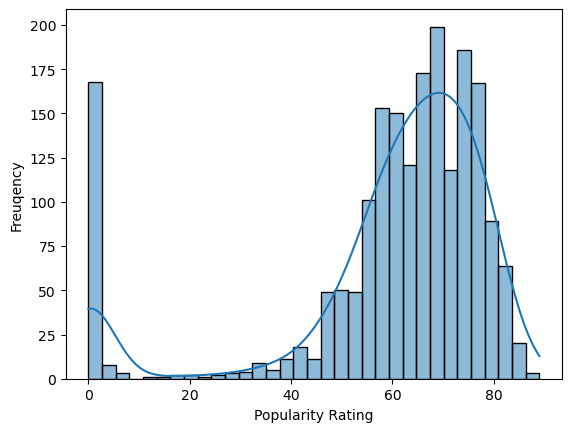

In [4]:
# Popularity 
sns.histplot(data = dataframe_filtered, x = 'popularity', kde = True)
plt.xlabel('Popularity Rating')
plt.ylabel('Freuqency')
plt.show()

In left skewed data, the median > mean. In the statistics computed for 'popularity', the mean was 59.63 with a median of 65.0. 
Thus, 'popularity' is negatively skewed. 

In [5]:
# Strip any whitespace, split by comma, and take the first genre listed
dataframe_filtered['genre'] = dataframe_filtered['genre'].replace('set()', 'Unknown')
dataframe_filtered['primary_genre'] = dataframe_filtered['genre'].apply(lambda x: x.split(',')[0].strip())

C:\Users\mlkum\AppData\Local\Temp\ipykernel_4576\1329717149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered['genre'] = dataframe_filtered['genre'].replace('set()', 'Unknown')
C:\Users\mlkum\AppData\Local\Temp\ipykernel_4576\1329717149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered['primary_genre'] = dataframe_filtered['genre'].apply(lambda x: x.split(',')[0].strip())


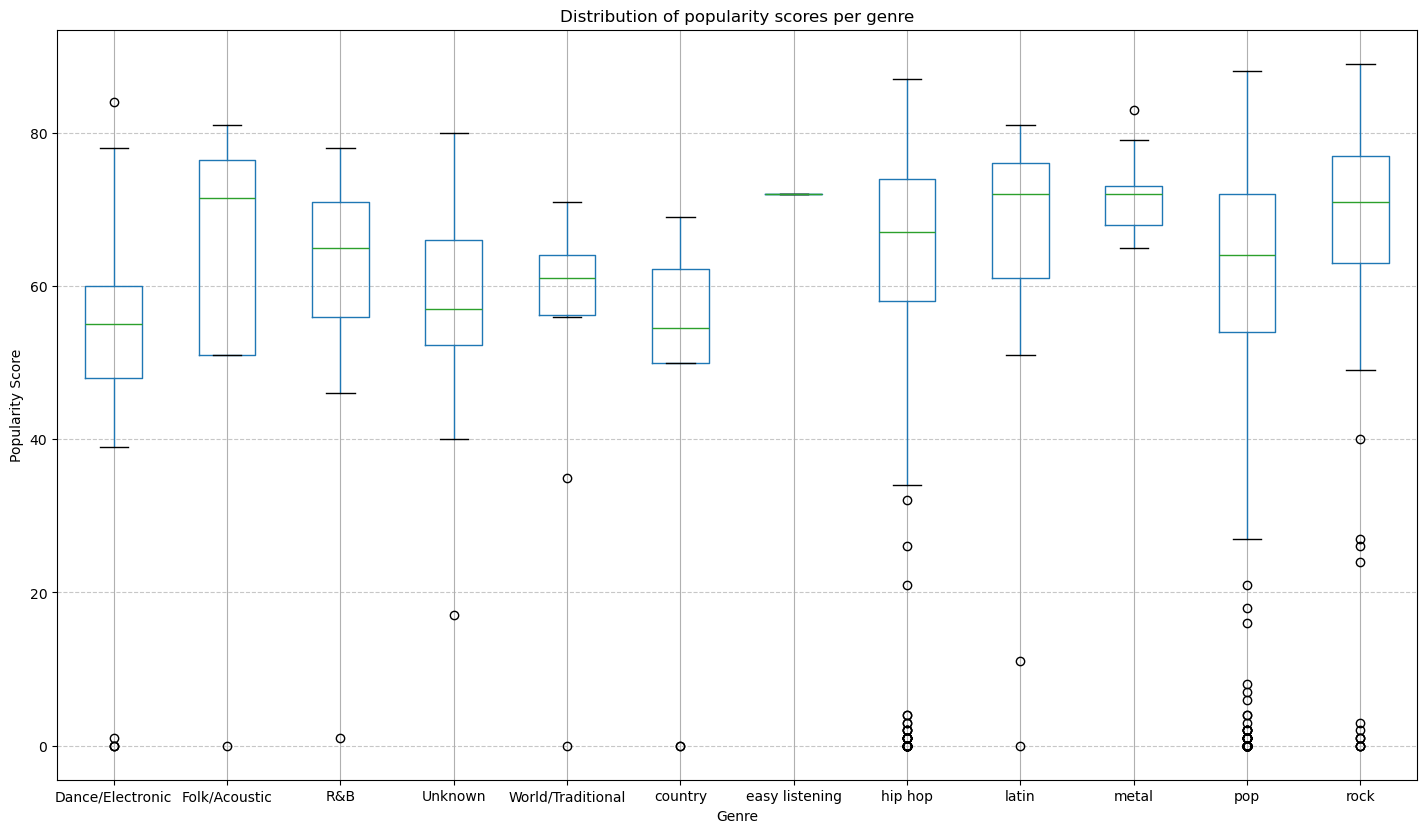

In [6]:
# Creating the box plot using object-oriented approach
fig, ax = plt.subplots(figsize=(17, 10))

dataframe_filtered.boxplot(column='popularity', by='primary_genre', ax=ax)
ax.set_title('Distribution of popularity scores per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Popularity Score')
plt.suptitle('')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [7]:
print(dataframe_filtered[['genre', 'primary_genre']])

                 genre primary_genre
0                  pop           pop
1            rock, pop          rock
2         pop, country           pop
3          rock, metal          rock
4                  pop           pop
...                ...           ...
1995               pop           pop
1996               pop           pop
1997  hip hop, country       hip hop
1998               pop           pop
1999           hip hop       hip hop

[1941 rows x 2 columns]


In [8]:
print(dataframe_filtered['primary_genre'].nunique())
print(dataframe_filtered['primary_genre'].value_counts())

12
primary_genre
pop                  912
hip hop              749
rock                 155
Dance/Electronic      41
Unknown               22
latin                 15
R&B                   13
World/Traditional     10
country               10
metal                  9
Folk/Acoustic          4
easy listening         1
Name: count, dtype: int64


There are now 12 unique genres. 

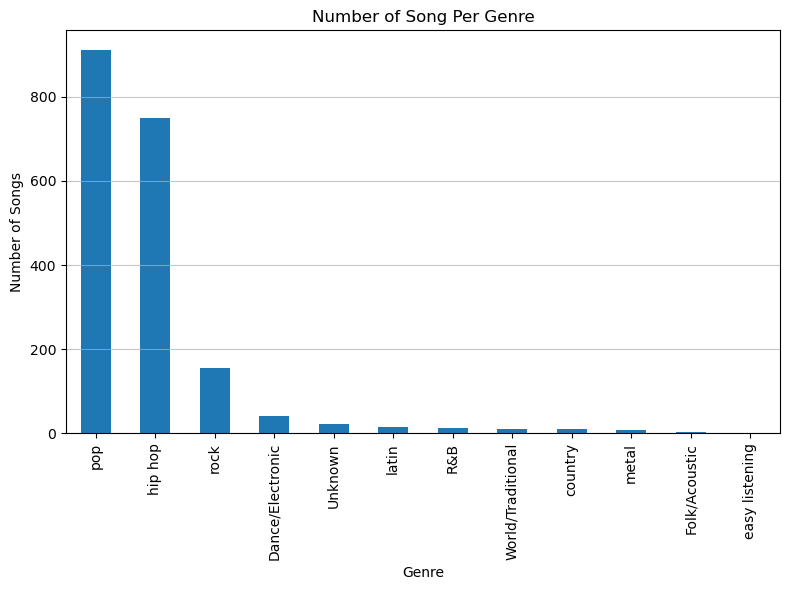

In [9]:
# Count values
genre_counts = dataframe_filtered['primary_genre'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Song Per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

A majority of our samples are in pop and hip-hop. A samller portion of our data is explained by the remaining genres. 

bool


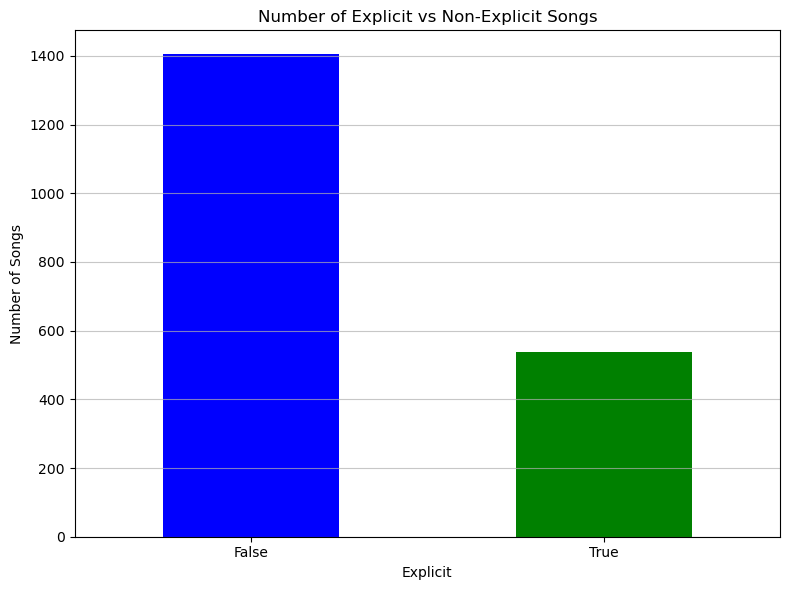

In [10]:
# Explicit
# Count values
print(dataframe_filtered['explicit'].dtype)
explicit_counts = dataframe_filtered['explicit'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
explicit_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Number of Songs')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

A majority of songs observed did not contain any explicit content. The field 'explicit' is defined as the lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children. There is only a small proportion of songs where there is explicit language. Inutively this makes sense because pop and hip-songs were a majority of our data's samples which typocally less explciit then other genres such as rap. 

In [11]:
dataframe_filtered['explicit'] = dataframe_filtered['explicit'].astype(int)

C:\Users\mlkum\AppData\Local\Temp\ipykernel_4576\2044812435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered['explicit'] = dataframe_filtered['explicit'].astype(int)


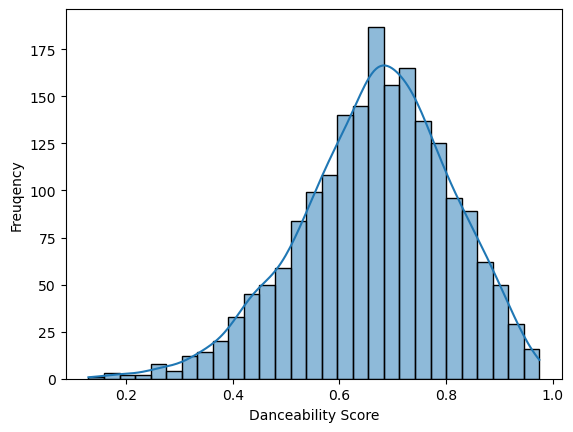

In [12]:
sns.histplot(data = dataframe_filtered, x = 'danceability', kde = True)
plt.xlabel('Danceability Score')
plt.ylabel('Freuqency')
plt.show()

The distribution of danceability ratings revealed a symmetric distribution with equal mean and median. Thus, the distribution of danceability scores are uniform. 

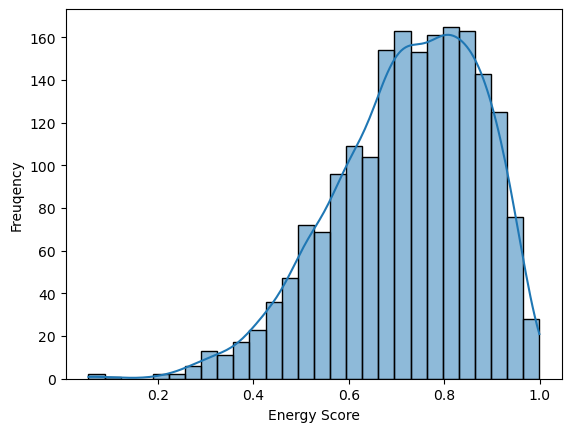

In [13]:
sns.histplot(data = dataframe_filtered, x = 'energy', kde = True)
plt.xlabel('Energy Score')
plt.ylabel('Freuqency')
plt.show()

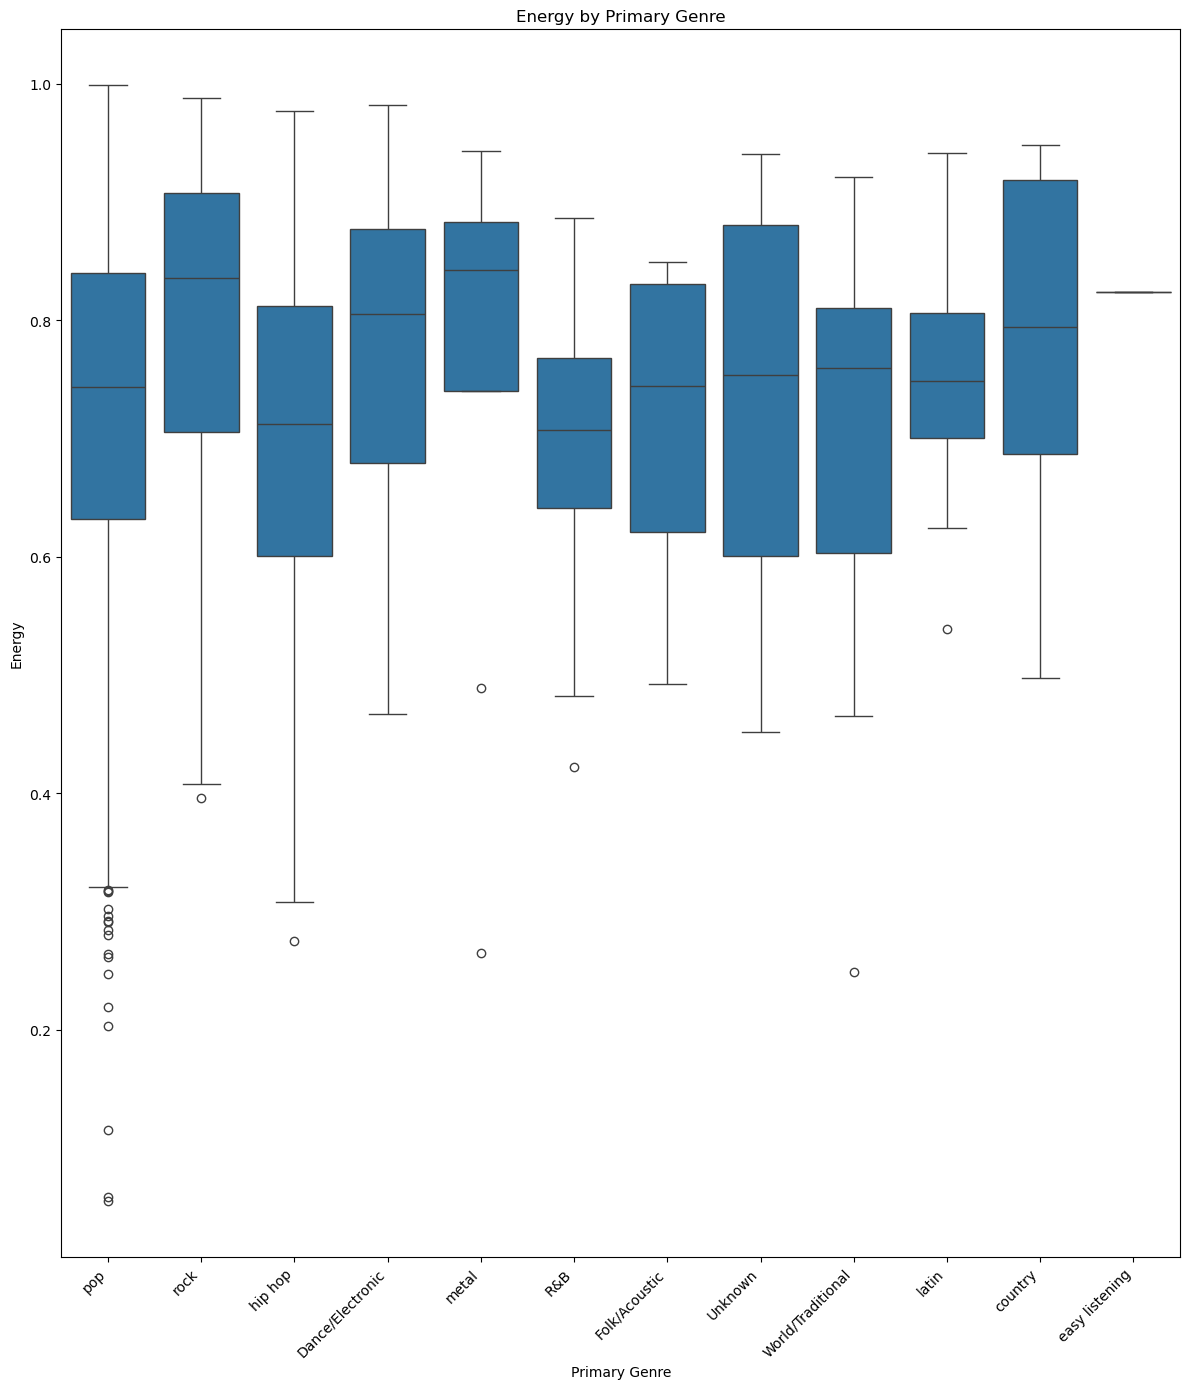

In [14]:
plt.figure(figsize=(12, 14))
sns.boxplot(x='primary_genre', y='energy', data=dataframe_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Energy by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()

The distribution of energy scores revealed that median > mean. Thus, 'Energy Score' is negatively skewed. 

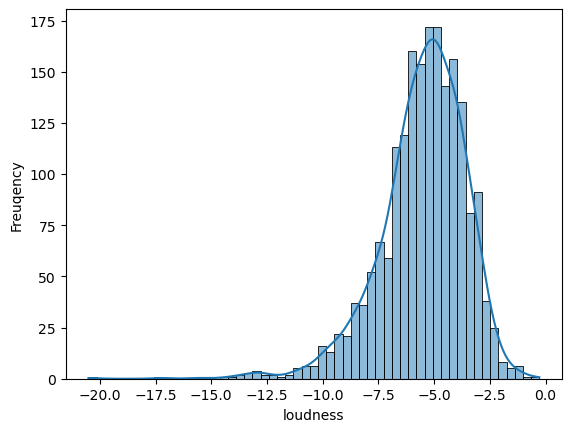

In [15]:
sns.histplot(data = dataframe_filtered, x = 'loudness', kde = True)
plt.xlabel('loudness')
plt.ylabel('Freuqency')
plt.show()

The distribution of 'Loudness' scores revealed that the mean > median. Thus, 'Loudness' is positvely skewed. 

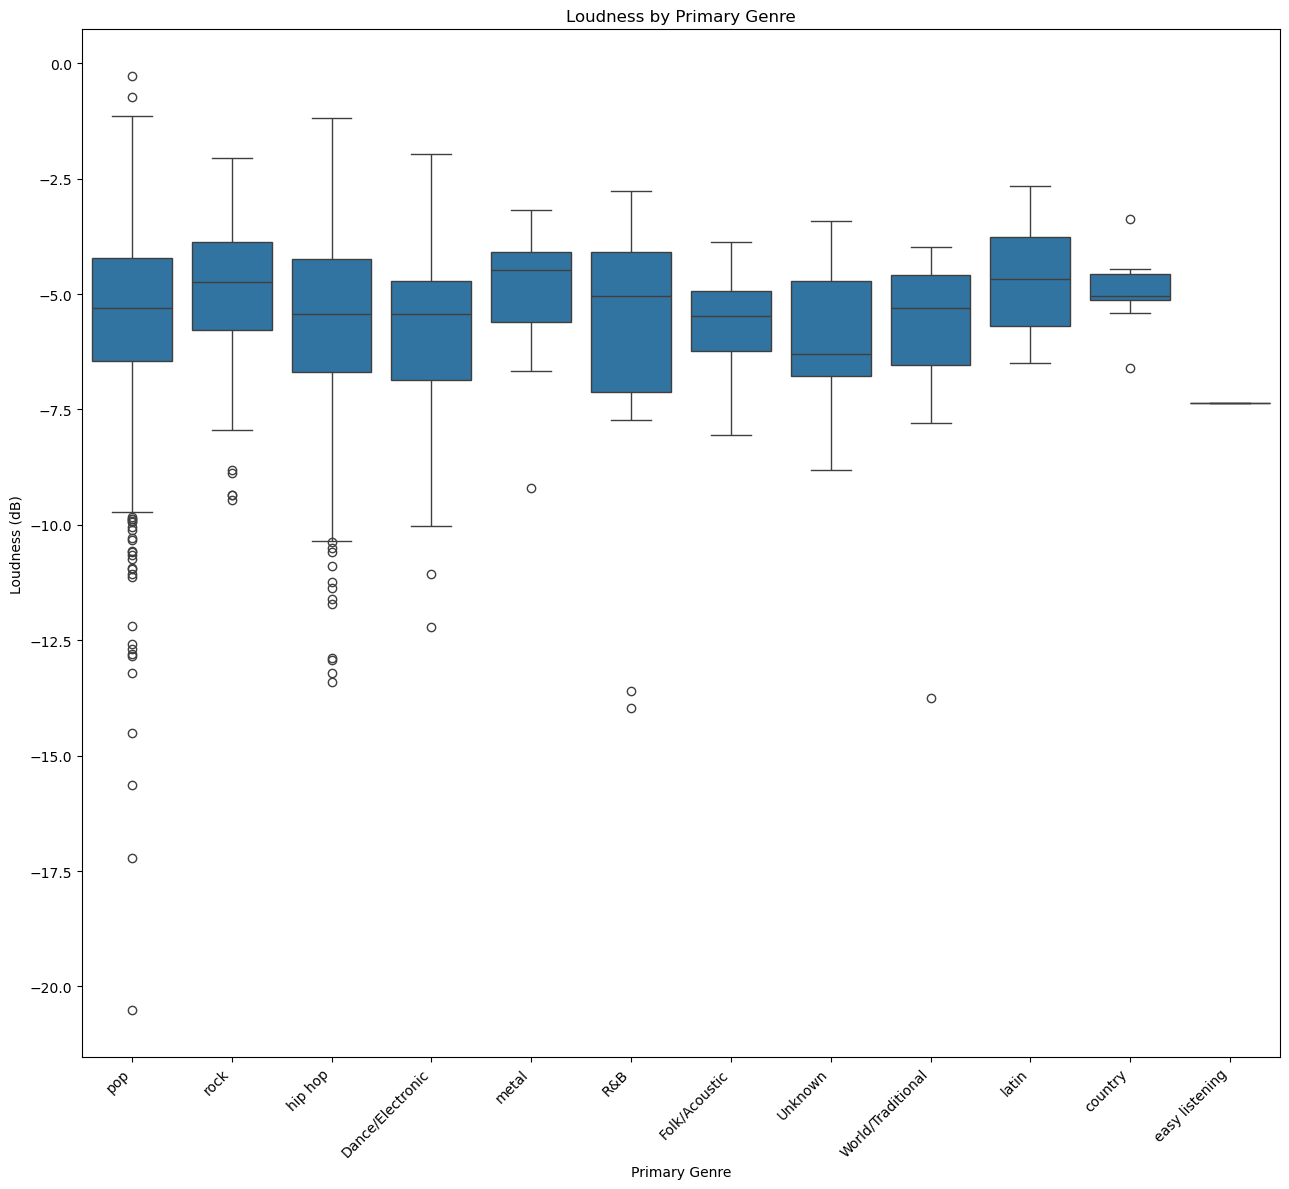

In [16]:
plt.figure(figsize=(13, 12))
sns.boxplot(x='primary_genre', y='loudness', data=dataframe_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Loudness by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Loudness (dB)')
plt.tight_layout()
plt.show()

In left skewed data, the median > mean. In the statistics computed for 'loudness', the mean was -5.51 with a median of -5.29. 

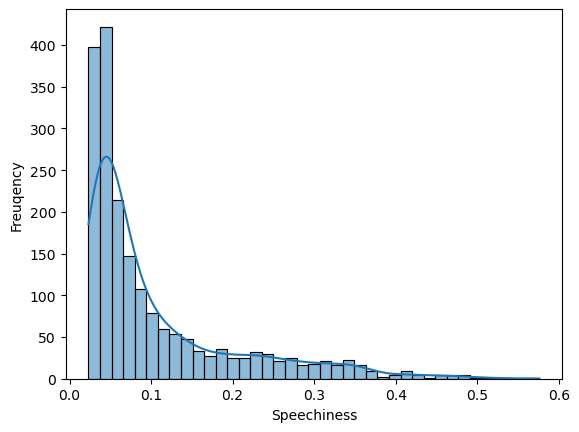

In [17]:
sns.histplot(data = dataframe_filtered, x = 'speechiness', kde = True)
plt.xlabel('Speechiness')
plt.ylabel('Freuqency')
plt.show()

In right skewed data, the mean > median. In the statistics computed for 'speechiness', the mean was 0.10 with a median of 0.06. Thus, 'speechiness' is right skewed. 

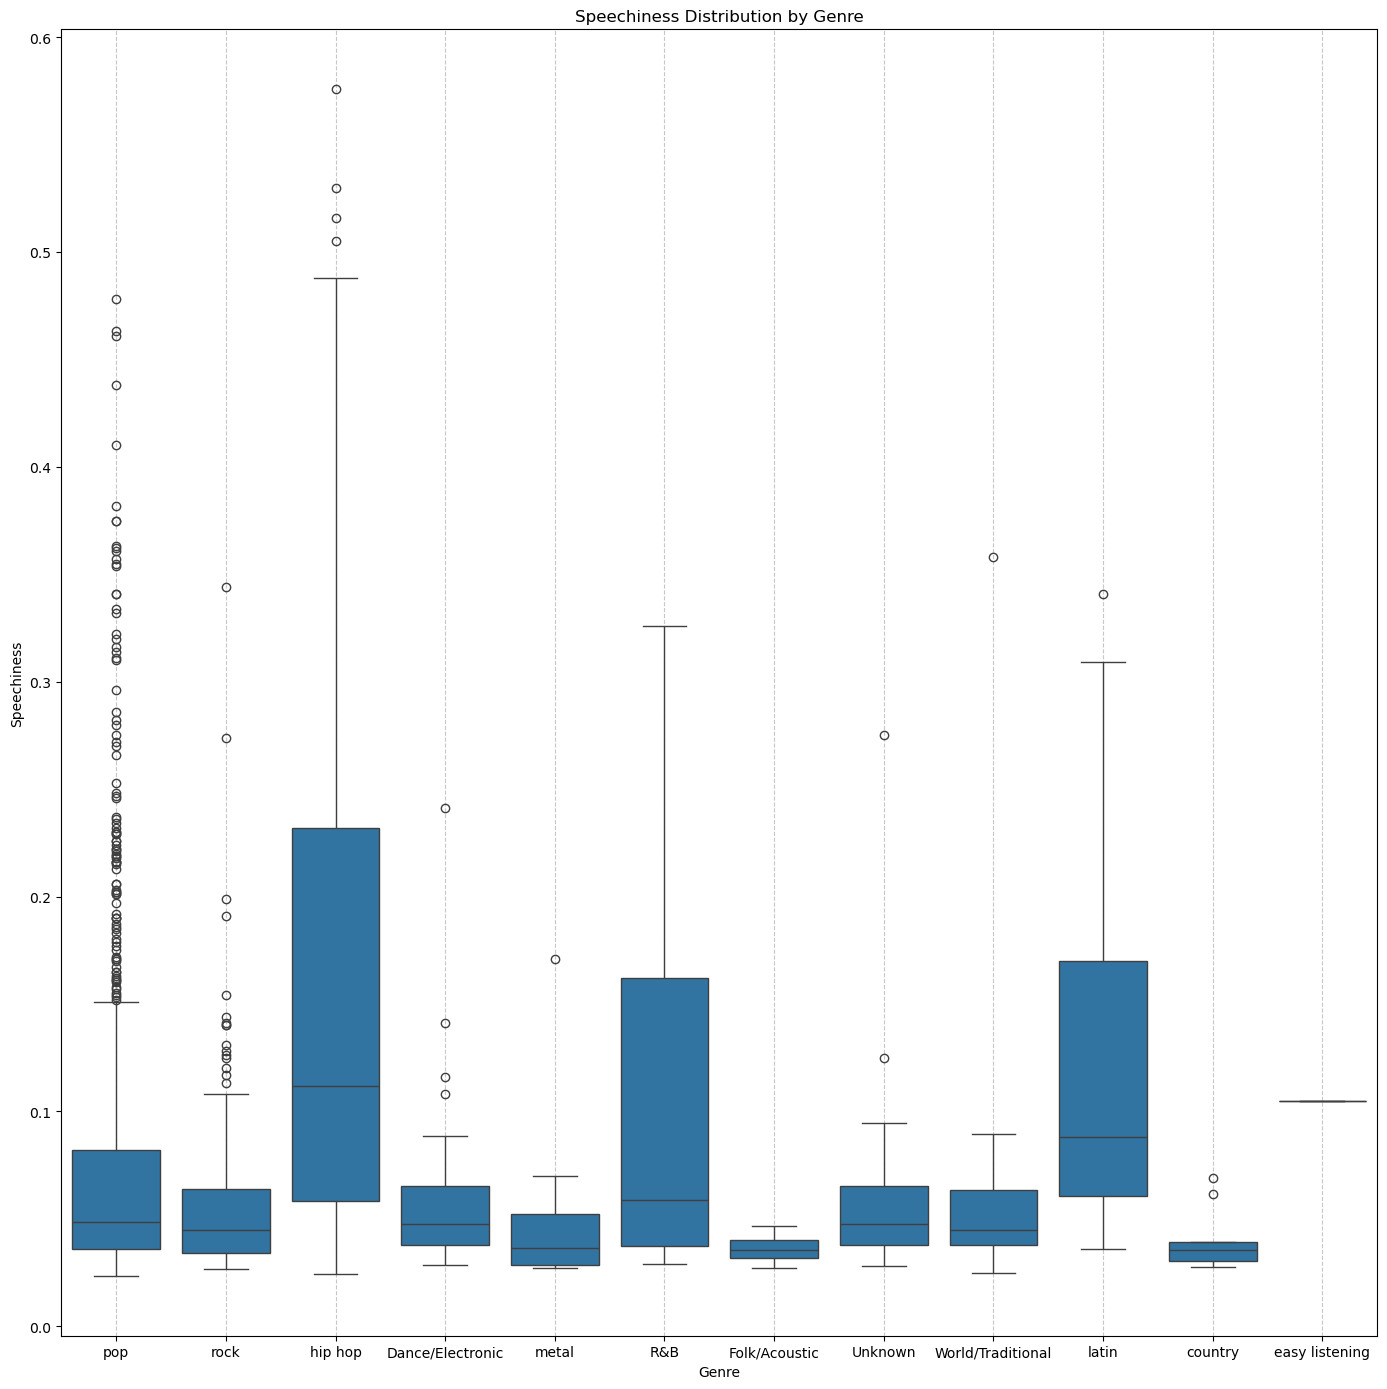

In [18]:
plt.figure(figsize=(14, 14))
sns.boxplot(x='primary_genre', y='speechiness', data=dataframe_filtered, orient='v')
plt.title('Speechiness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

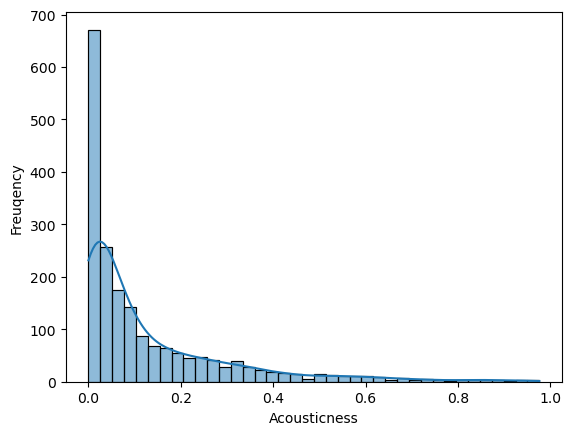

In [19]:
sns.histplot(data = dataframe_filtered, x = 'acousticness', kde = True)
plt.xlabel('Acousticness')
plt.ylabel('Freuqency')
plt.show()

In right skewed data, the mean > median. In the statistics computed for 'acousticness', the mean was 0.13 with a median of 0.06. Thus, 'acousticness' is right skewed. 

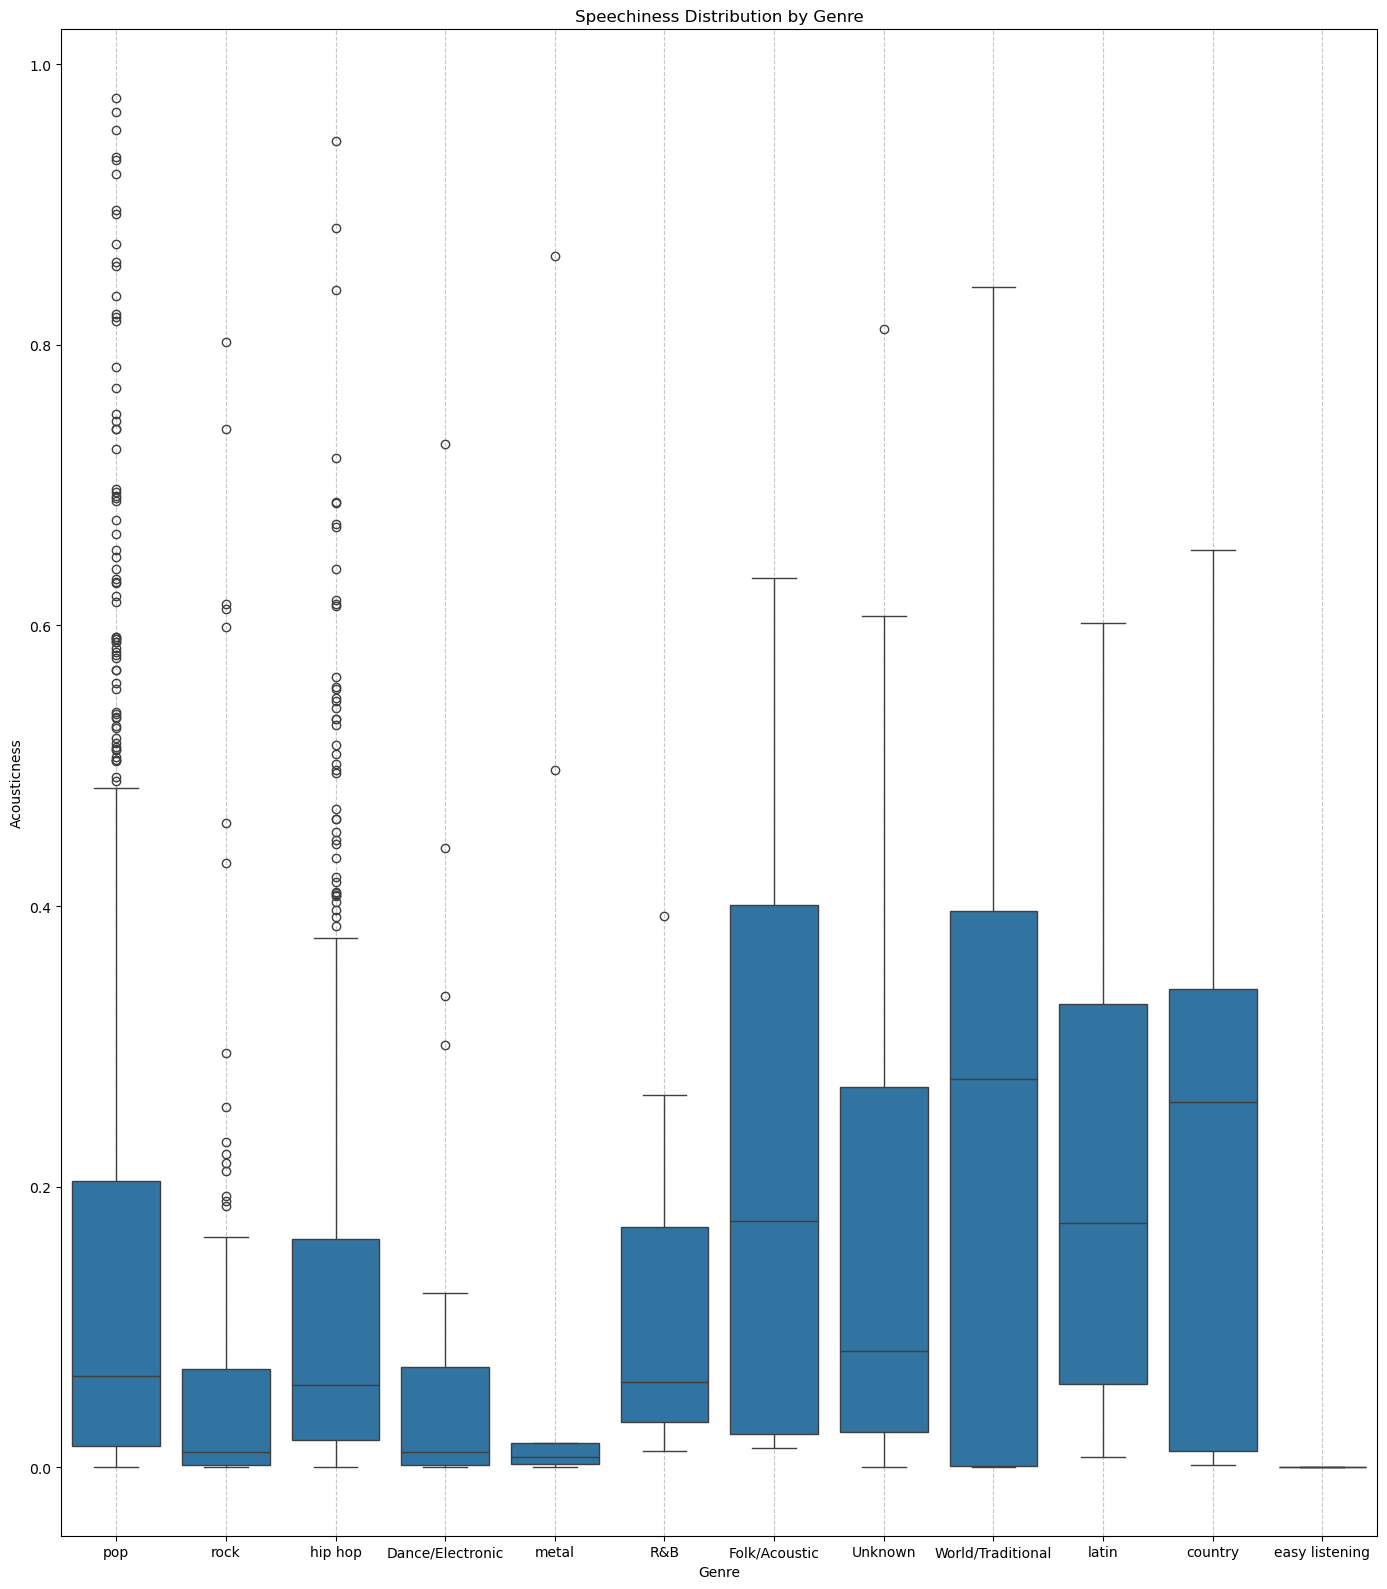

In [20]:
plt.figure(figsize=(14, 16))
sns.boxplot(x='primary_genre', y='acousticness', data=dataframe_filtered, orient='v')
plt.title('Speechiness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

left-skewed

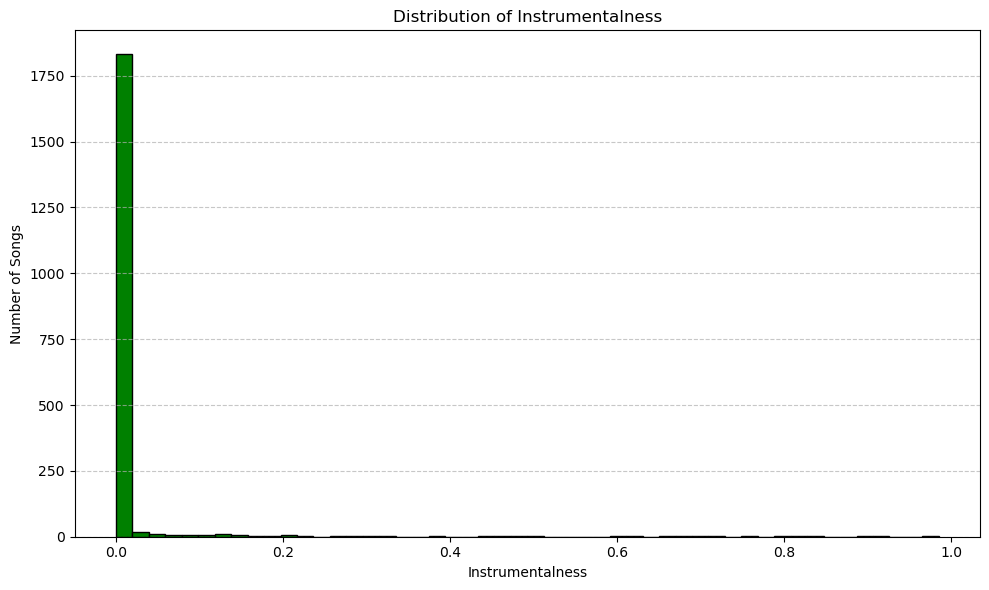

In [21]:
# Insturmentals
plt.figure(figsize=(10, 6))
plt.hist(dataframe_filtered['instrumentalness'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

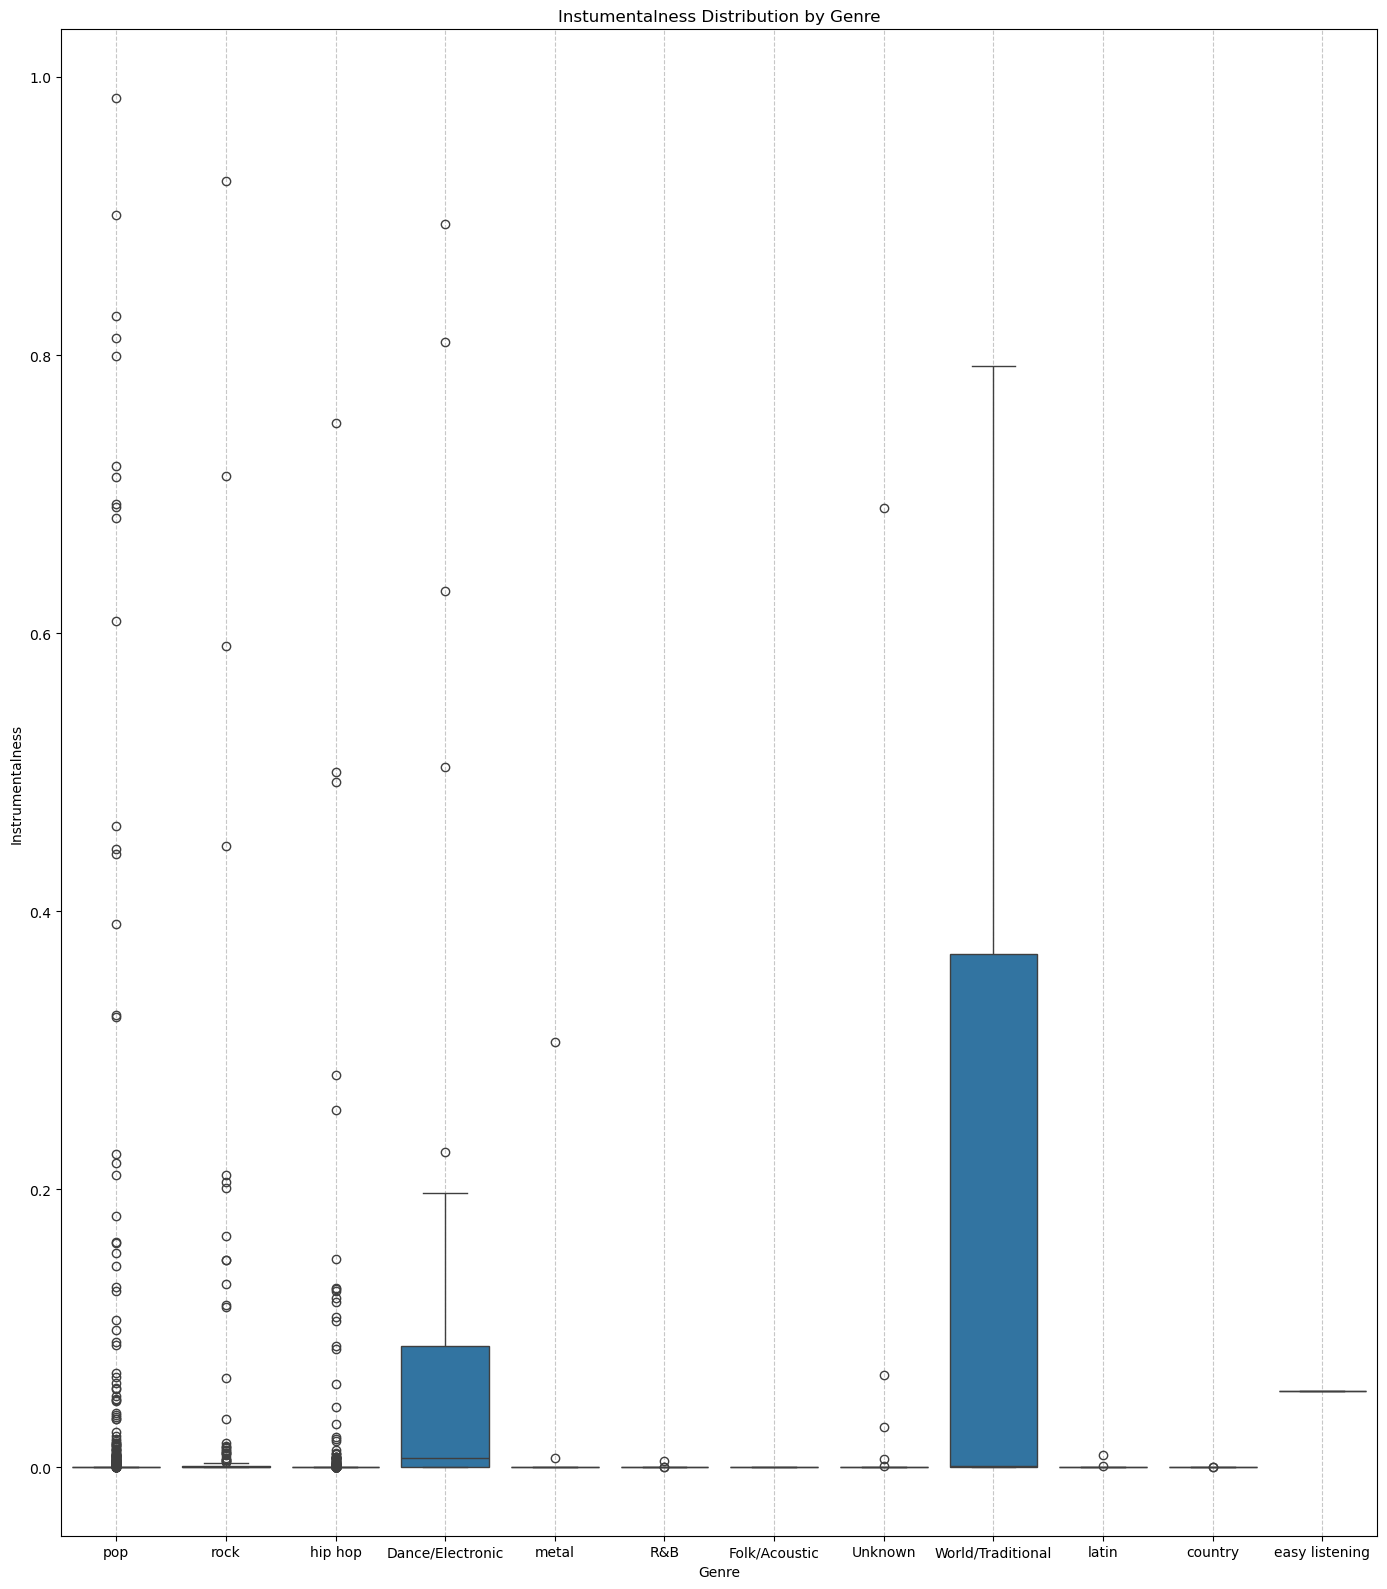

In [22]:
plt.figure(figsize=(14, 16))
sns.boxplot(x='primary_genre', y='instrumentalness', data=dataframe_filtered, orient='v')
plt.title('Instumentalness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Instrumentalness')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Instumentals predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Since a majority of the samples are clustered around zero (right-skewed), this is evident of songs with lots of vocal content. Pop,hip-hop, rock, tend to have lots of vocal content compared to world and electronic music. 

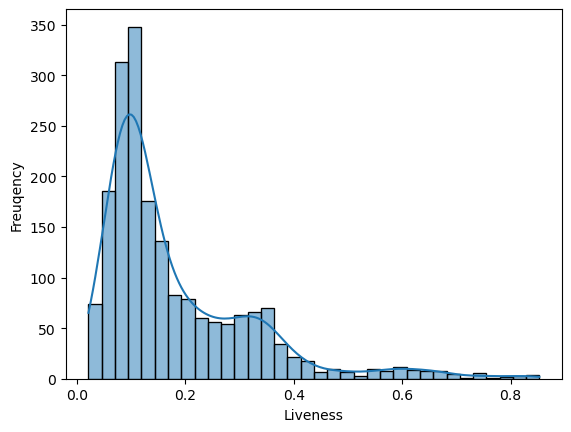

In [23]:
# Liveness
sns.histplot(data = dataframe_filtered, x = 'liveness', kde = True)
plt.xlabel('Liveness')
plt.ylabel('Freuqency')
plt.show()

The distribution of liveness revealed a positively skewed distribution with mean 0.18 and median 0.12, meaning most songs have low liveness scores but few have very high values (above 0.8) indicating the likehood that the track is live. 

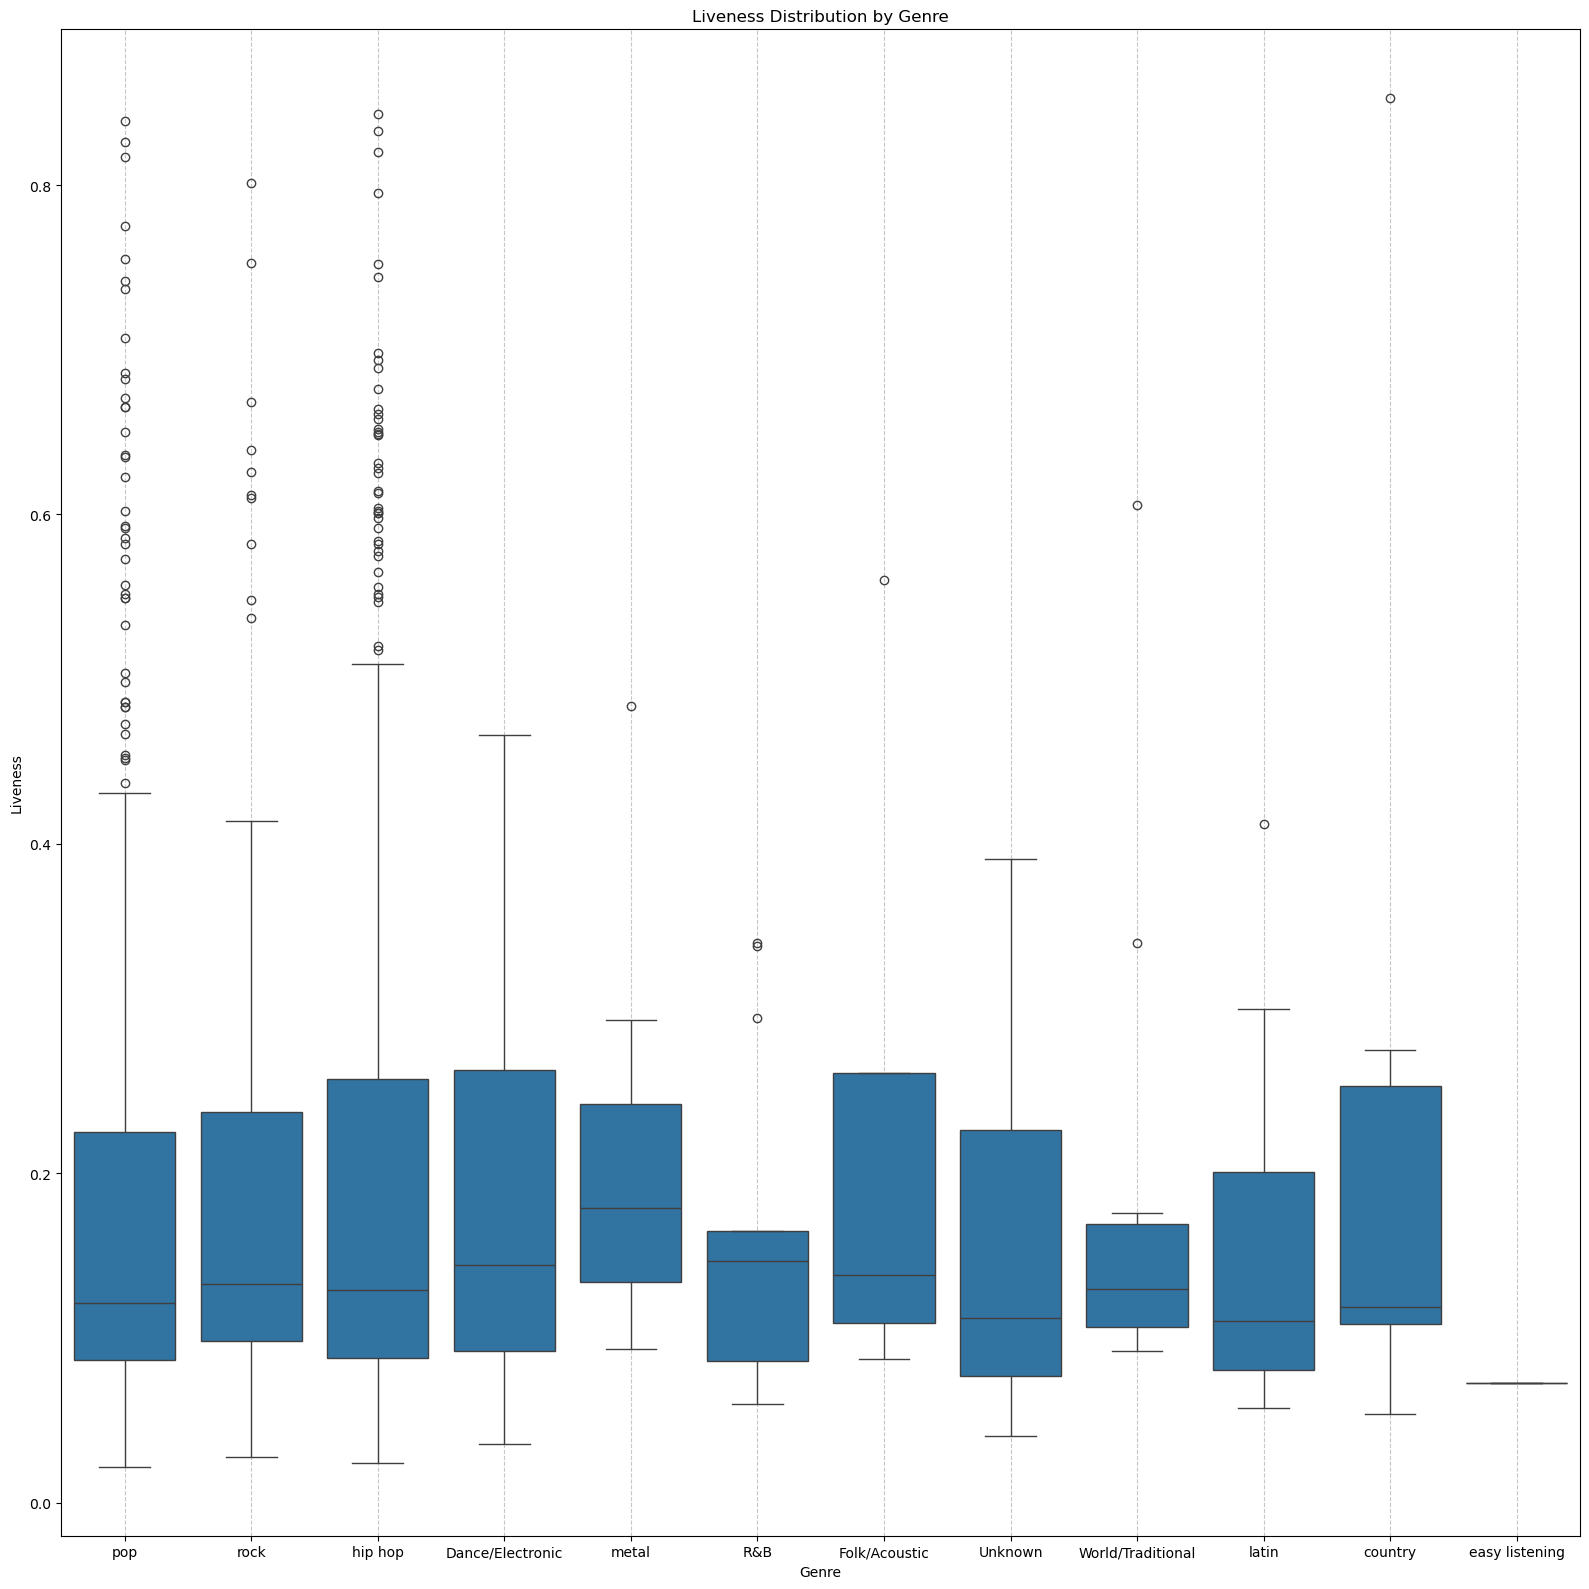

In [24]:
plt.figure(figsize=(16, 16))
sns.boxplot(x='primary_genre', y='liveness', data=dataframe_filtered, orient='v')
plt.title('Liveness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Liveness')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. The distribution of liveness is strongly right-skewed, suggesting that most songs are studio-produced with minimal audience presence. Only a small portion of the dataset represents live recordings. Genres like pop and hip-hop typically are studio-produced while metal and rock are more likely to have live recordings. 

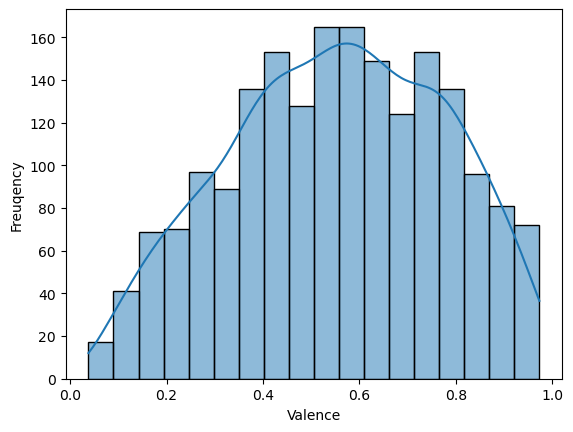

In [25]:
# valence
sns.histplot(data = dataframe_filtered, x = 'valence', kde = True)
plt.xlabel('Valence')
plt.ylabel('Freuqency')
plt.show()

The distribution for 'valence' revealed equal mean and median suggesting an approximatley symmetric distribution with no strong skew. The symmetric distribution around ~ 0.55-0.56 implies a balanced mix of emotional tones in the dataset. Valence is the musical measure of 'positivness' on a 0-1.0 scale. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

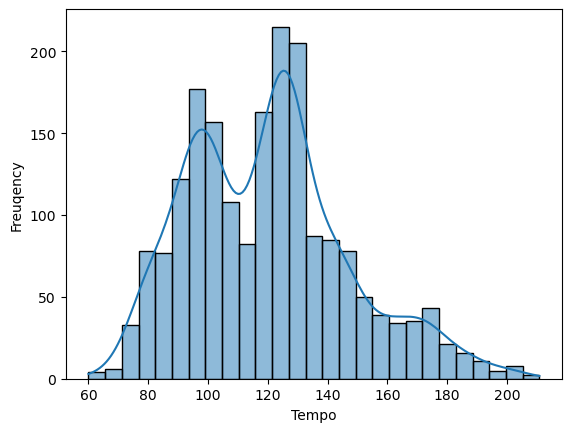

In [26]:
# tempo 
sns.histplot(data = dataframe_filtered, x = 'tempo', kde = True)
plt.xlabel('Tempo')
plt.ylabel('Freuqency')
plt.show()

The distribution for 'tempo' revealed equal mean and median suggesting an approximatley symmetric distribution with no strong skew. The symmetric distribution around ~ 90-130 BPM implies a typical tempo for hip-hop, dance, and pop tracks. Thus, the dataset has a balanced mix of song speeds. 

[1074  867]


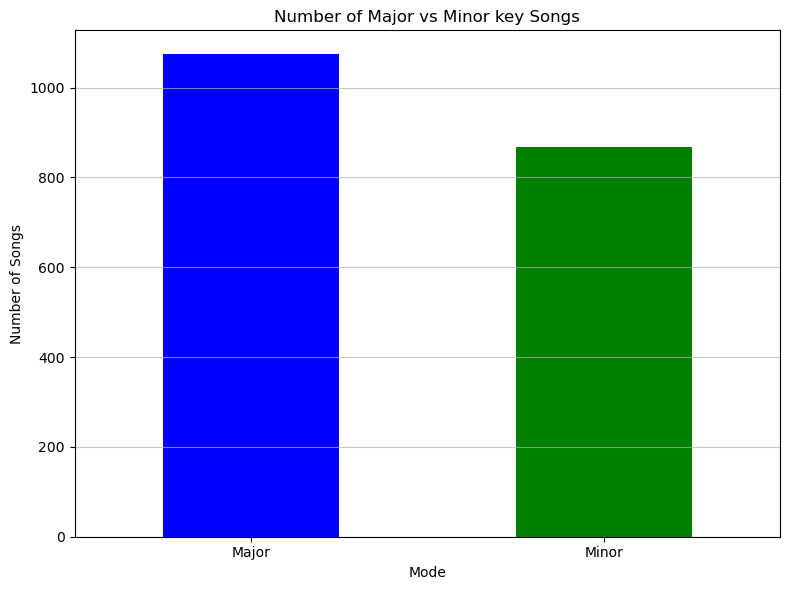

In [27]:
# Mode
# Count values
mode_counts = dataframe_filtered['mode'].value_counts()
print(dataframe_filtered['mode'].value_counts().unique()) # 1074 Major key songs, 867 Minor key songs

# Plot
plt.figure(figsize=(8, 6))
mode_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Major vs Minor key Songs')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.xticks(ticks=[0, 1], labels=['Major', 'Minor'], rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

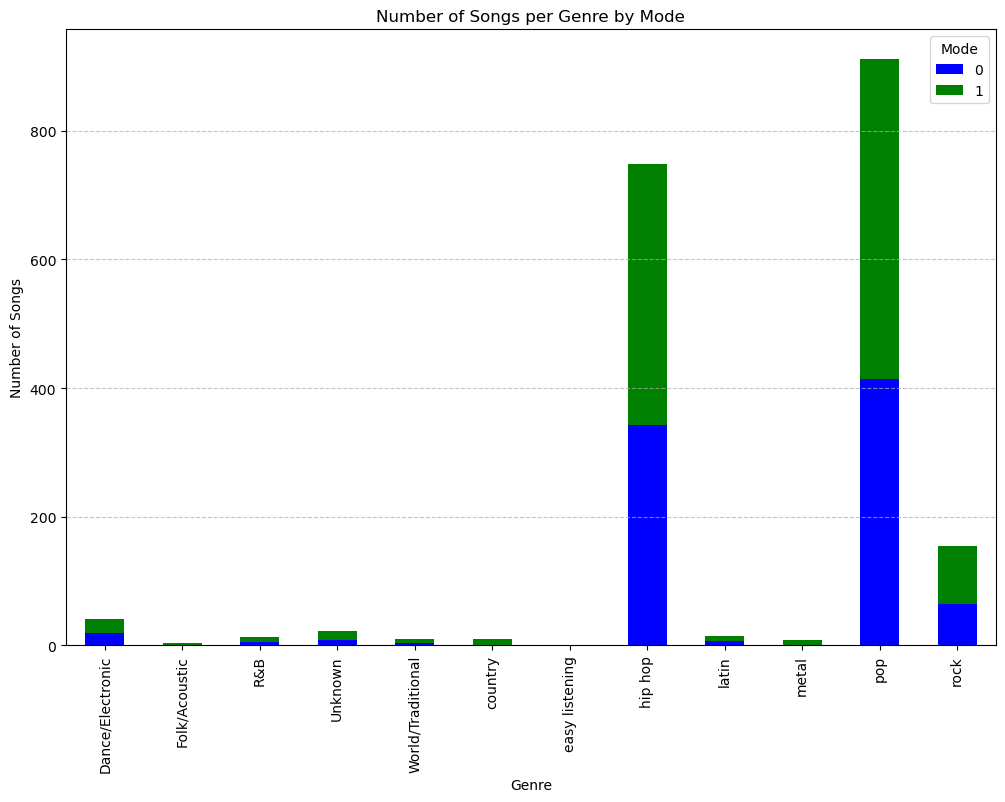

In [28]:
# Creating the stacked bar plot using object-oriented approach
fig, ax = plt.subplots(figsize=(12, 8))

stacked_data = dataframe_filtered.pivot_table(index='primary_genre', columns='mode', aggfunc='size', fill_value=0)

stacked_data.plot(kind='bar', stacked=True, ax=ax, color=['blue','green'])
ax.set_title('Number of Songs per Genre by Mode')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
ax.legend(title='Mode')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. The distribution of songs in the major track compared to the distirbution of songs in the minor track revealed that 1074 songs were in the major track while only 867 were in the minor track. Pop, dance, and rock music tend to be in the major track with genres such as alternative and metal are in the minor track. 

In [29]:
# Artist
dataframe_filtered['artist'].value_counts()

artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Mumford & Sons     1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [30]:
# Song
dataframe_filtered['song'].value_counts()

song
Sorry                            4
Higher                           3
Faded                            3
I Like It                        3
Mercy                            3
                                ..
Smile                            1
Check On It (feat. Slim Thug)    1
Life is a Highway                1
When The Sun Goes Down           1
Circles                          1
Name: count, Length: 1879, dtype: int64

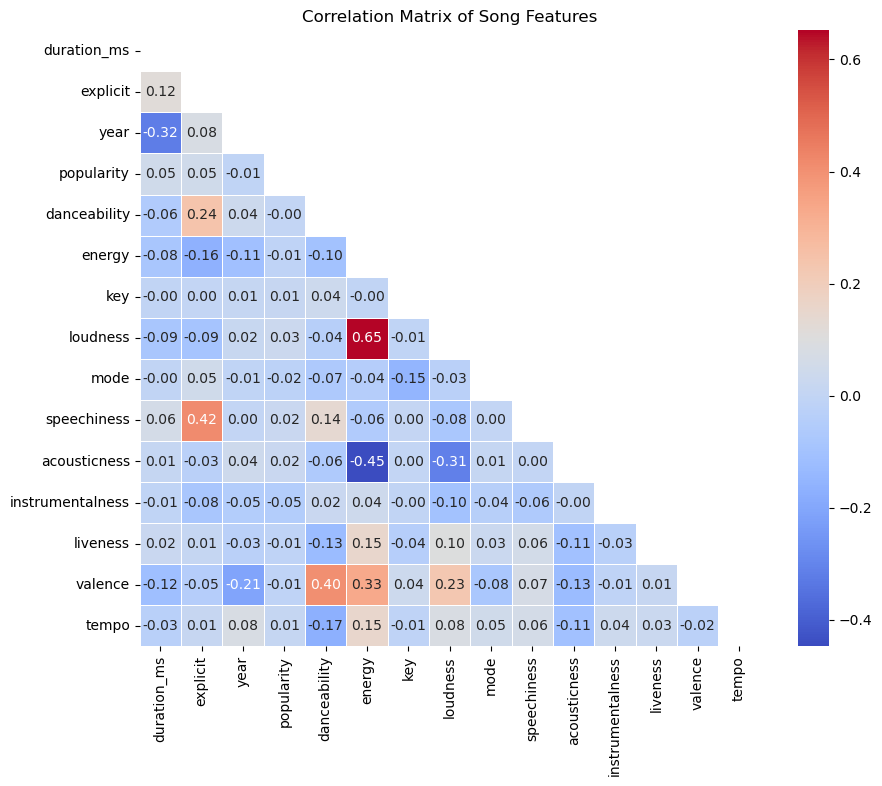

In [31]:
# Calculate correlation matrix - numerical columns only 
corr_matrix = dataframe_filtered.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # avoids redundant values and the 1.00s on the diagonal 

# Creating Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Song Features')
plt.show()

The correlation plot revealed a very strong positive correlation between energy and loudness: as the loudness of a track increases, its energy tends to increase as well. Acousticness and energy show a strong negative correlation, indicating that as acousticness decreases—typical of electronic or heavily produced tracks—energy tends to rise. Additionally, acousticness and loudness are moderately negatively correlated, suggesting that tracks with higher acousticness (more natural sounds) tend to be less loud, while those with lower acousticness tend to be louder.

Valence (a measure of musical positivity) and danceability exhibit a moderate positive correlation of 0.40, meaning that more positive tracks tend to be more danceable. Similarly, speechiness and explicit content are moderately positively correlated (0.40), reflecting that songs with more spoken content, such as rap or hip-hop, are more likely to include explicit lyrics (profanity or adult themes).

Finally, year and duration_ms have a moderate negative correlation (-0.32), indicating that newer songs tend to be shorter in duration. 

Since energy and loudness are very strongly correlated, one will be considered to be droped from the model to reduce multicollinearity. In addition, since speechiness and explicit are strongly corellated, I will also consider removing one of those variables.  